In [4]:
import os
import pandas as pd
HOUSING_PATH = "datasets/housing"
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [5]:
housing=load_housing_data()


In [6]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
train_set, test_set = split_train_test(housing, 0.2)

In [8]:
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [9]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]




In [10]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")


In [11]:
print(len(train_set), "train +", len(test_set), "test")

16362 train + 4278 test


In [12]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [13]:
print(len(train_set), "train +", len(test_set), "test")

16267 train + 4373 test


In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [16]:
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [64]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_err"] = housing["median_income"] /1.5 - np.ceil(housing["median_income"] / 1.5)


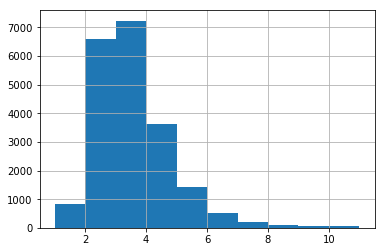

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
housing["income_cat"].hist()

In [68]:
housing["income_cat"].value_counts() / len(housing)

3.0     0.350581
2.0     0.318847
4.0     0.176308
5.0     0.068944
1.0     0.039826
6.0     0.025775
7.0     0.009157
8.0     0.005087
9.0     0.002422
11.0    0.002374
10.0    0.000678
Name: income_cat, dtype: float64

In [72]:
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

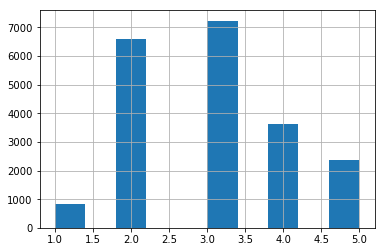

In [73]:
housing["income_cat"].hist()

In [74]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [75]:
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [76]:
len(train_set)+len(test_set)

len(housing)

20640

In [77]:
 housing["income_cat"].head(10)

0    5.0
1    5.0
2    5.0
3    4.0
4    3.0
5    3.0
6    3.0
7    3.0
8    2.0
9    3.0
Name: income_cat, dtype: float64

In [28]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64